In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime
from datetime import datetime
from datetime import timedelta

In [2]:
datos=pd.read_csv( r'owid-covid-data.csv')

In [3]:
datos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134235 entries, 0 to 134234
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    134235 non-null  object 
 1   continent                                   125670 non-null  object 
 2   location                                    134235 non-null  object 
 3   date                                        134235 non-null  object 
 4   total_cases                                 126859 non-null  float64
 5   new_cases                                   126857 non-null  float64
 6   new_cases_smoothed                          125814 non-null  float64
 7   total_deaths                                115686 non-null  float64
 8   new_deaths                                  115882 non-null  float64
 9   new_deaths_smoothed                         125814 non-null  float64
 

In [4]:
datos.columns.unique() 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
lista_pais = datos['location'].unique()
print(sorted(lista_pais))

['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'F

##### Selecionaremos tres paises de Europa y tres de America Latina.
   
      Se consideraron aquellos pasies vecinos con acciones similares en el control de la pandemia. No son comparables en cuanto a su poblacion, por lo tanto utilizaremos indicadores por millon de habitantes.

    Europa = Alemania, Reino Unido y España.
    America Latina = Chile, Colomnia, Argentina.

In [6]:
paises_comp = datos[datos.location.isin(['Chile','Colombia','Argentina','Spain','Germany','United Kingdom'])]
paises_comp['location'].unique()

array(['Argentina', 'Chile', 'Colombia', 'Germany', 'Spain',
       'United Kingdom'], dtype=object)

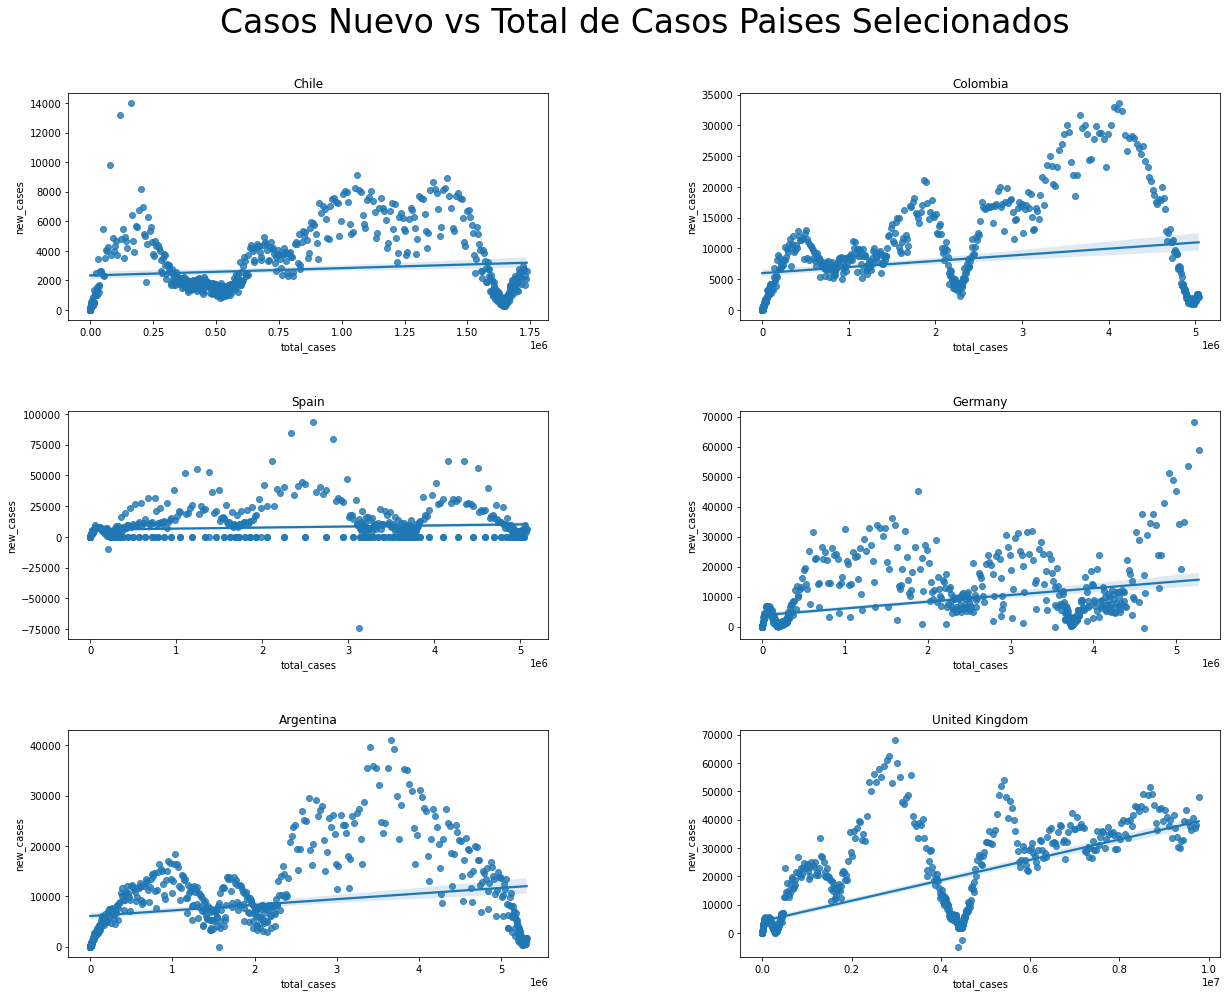

In [7]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(20,15))

sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Chile'],ax=ax1).set_title('Chile')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Colombia'],ax=ax2).set_title('Colombia')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Spain'],ax=ax3).set_title('Spain')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Germany'],ax=ax4).set_title('Germany')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Argentina'],ax=ax5).set_title('Argentina')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='United Kingdom'],ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Casos Nuevo vs Total de Casos Paises Selecionados', fontsize=33)
plt.show()

##### Podemos observar un relacion directa entre el total de casos y nuevos casos tanto para los paises de europa y de america latina selecionados.

<Figure size 432x288 with 0 Axes>

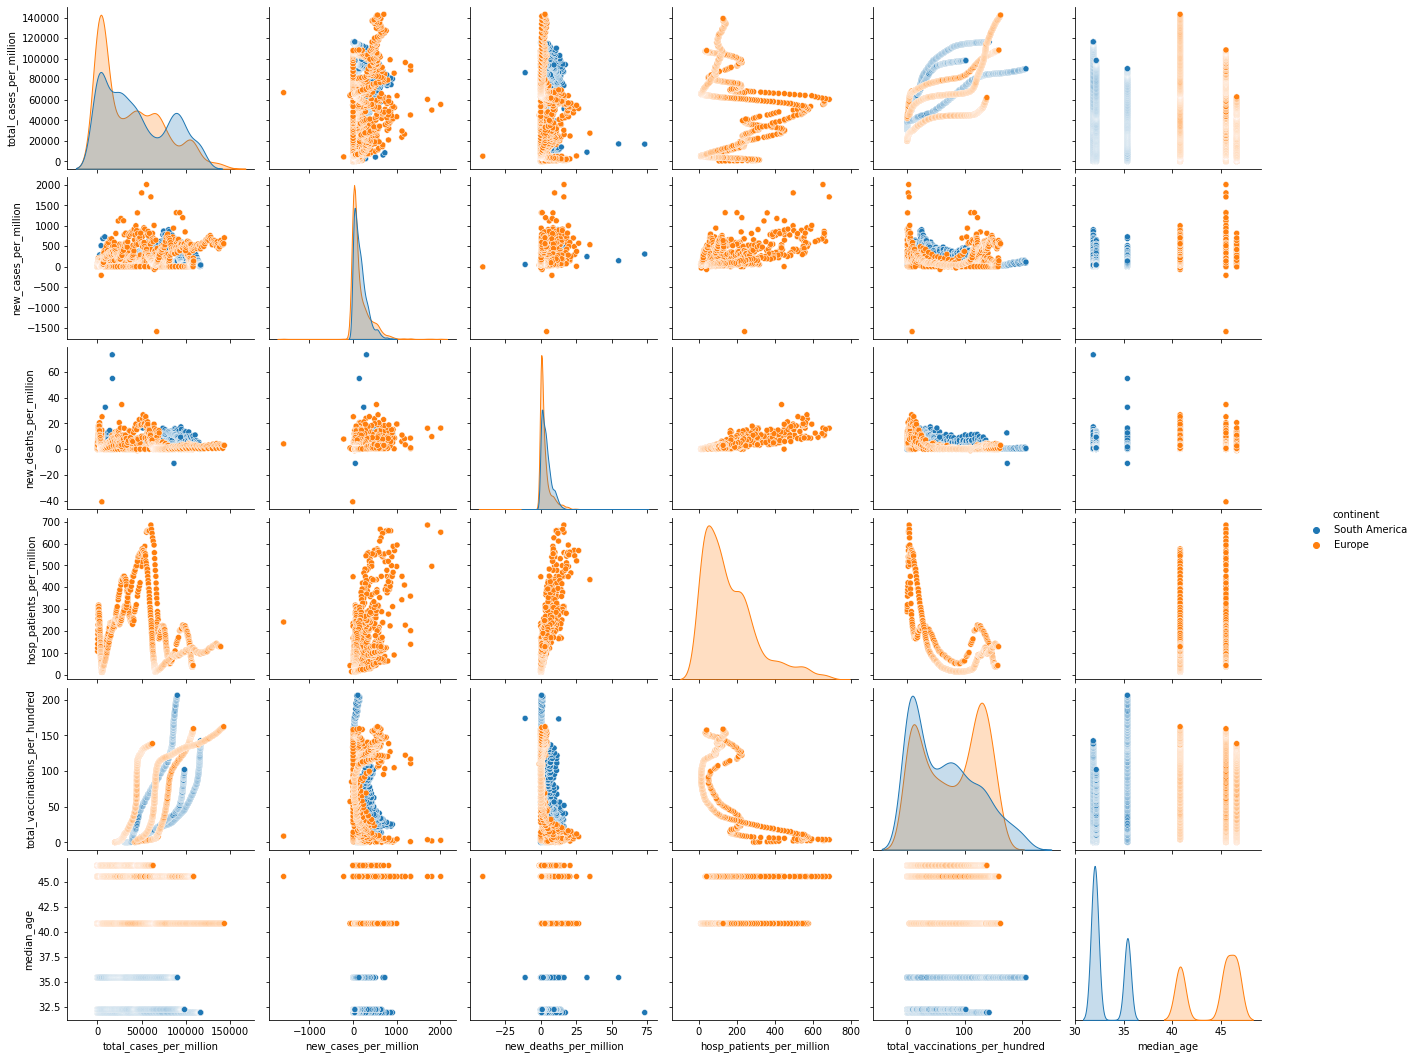

In [8]:
figz= plt.figure()
col_prop = ["total_cases_per_million","new_cases_per_million","new_deaths_per_million",'hosp_patients_per_million','total_vaccinations_per_hundred','median_age',"continent"]
graph=sns.pairplot(paises_comp[col_prop],hue="continent")
graph.fig.set_size_inches(20,15)
plt.show()

##### Podemos observar algunas relaciones entre la cantiadad de muertes en funcion de como avanza la vacunacion, donde a medida que avanza esta medida las muertes se reducen de manera siginificativa en Europa y de una forma menos drastica en AL. Esto se debe a que en los paises de europeos tuvieron acceso mas temprano a vacunas a diferencia de Latam. Tambien el numero de hospitalizados baja, pero tambien podemos ver que estos datos en Latam no estan presentes.

##### Por otra parte los contagios no tiene un relacion a la vacunacion, entendiendo que estar vacunado no evita el contagio de covid-19.

##### Ademas es posible notar que la media de edad en Europa es mayor a la de Latam.

###### existen datos negativos lo que debe ser revisado.

<AxesSubplot:>

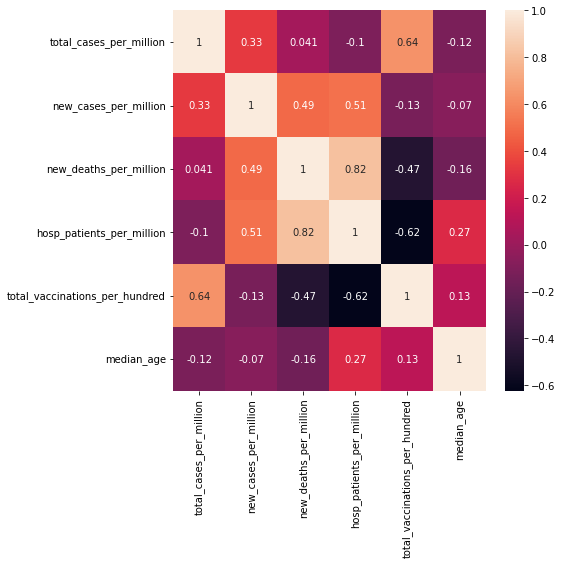

In [9]:
#col_prop = ["total_cases_per_million","new_cases_per_million","new_deaths_per_million",'hosp_patients_per_million','total_vaccinations_per_hundred','median_age',"continent"]
fig =plt.subplots(figsize=(7,7))
sns.heatmap(paises_comp[col_prop].corr(), annot=True)

##### En tanto las correlaciones directas relevantes entre total de caso y total de vacunas, muertes y hospotalizados. Relaciones inversas entre hospitalizados y vacunado. Algo que tiene bastante sentido en relacion a la contencion de la pandemia por parte de las campañas de vacunacion.

##### Separaremos los paises selecionados en diferentes set de datos para un trabajo comparativo.

In [10]:
paises_comp['people_vaccinated'].fillna(method='bfill',inplace=True)

C:\Users\leogo\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
df_cl= paises_comp[paises_comp['location']=='Chile']
df_co= paises_comp[paises_comp['location']=='Colombia']
df_sp= paises_comp[paises_comp['location']=='Spain']
df_ge= paises_comp[paises_comp['location']=='Germany']
df_ar= paises_comp[paises_comp['location']=='Argentina']
df_uk= paises_comp[paises_comp['location']=='United Kingdom']

In [12]:
df_cl=df_cl.drop(df_cl.index[len(df_cl)-1])
df_co=df_co.drop(df_co.index[len(df_co)-1])
df_sp=df_sp.drop(df_sp.index[len(df_sp)-1])
df_ge=df_ge.drop(df_ge.index[len(df_ge)-1])
df_ar=df_ar.drop(df_ar.index[len(df_ar)-1])
df_uk=df_uk.drop(df_uk.index[len(df_uk)-1])

##### Establecer los dias transcurridos nos ayudara a entender como se mueven los datos en el tiempo en una medida comparable, dado que sabemos que cada pais tomo medidas en diferentes momentos del tiempo, lo que comparado en fechas no resultaria conveniente.

In [13]:
#creamos la columna dias, que nos ayudara a trabajar los datos en funcion del tiempo, no hablamos de fechas si no de dias transcurridos.
df_cl['dias']=np.arange(0,len(df_cl['location']))
df_co['dias']=np.arange(0,len(df_co['location']))
df_sp['dias']=np.arange(0,len(df_sp['location']))
df_ge['dias']=np.arange(0,len(df_ge['location']))
df_ar['dias']=np.arange(0,len(df_ar['location']))
df_uk['dias']=np.arange(0,len(df_uk['location']))

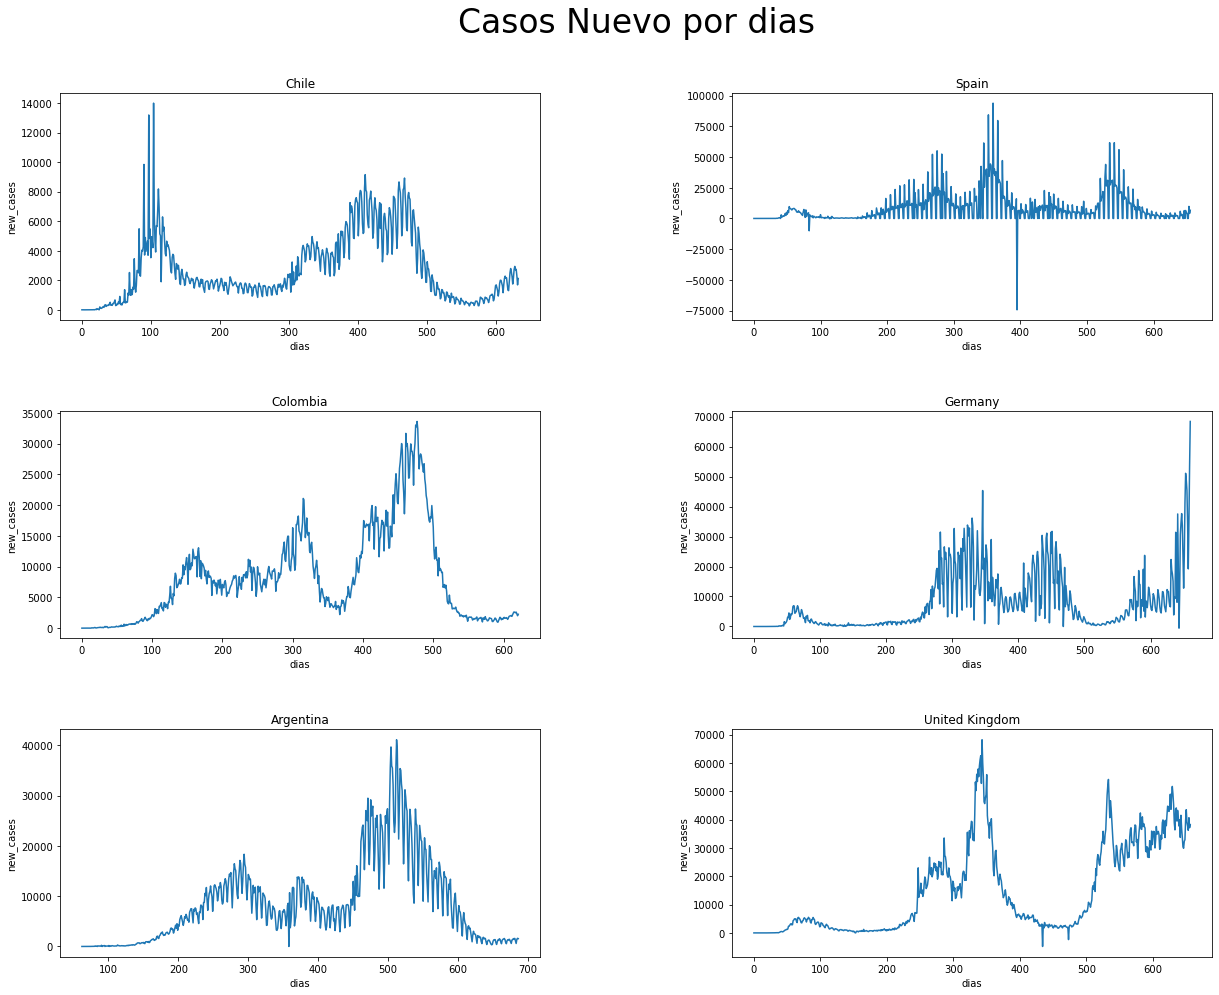

In [14]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6))= plt.subplots(3,2,figsize=(20,15))

sns.lineplot(x='dias',y='new_cases',data=df_cl,ax=ax1).set_title('Chile')
sns.lineplot(x='dias',y='new_cases',data=df_sp,ax=ax2).set_title('Spain')
sns.lineplot(x='dias',y='new_cases',data=df_co,ax=ax3).set_title('Colombia')
sns.lineplot(x='dias',y='new_cases',data=df_ge,ax=ax4).set_title('Germany')
sns.lineplot(x='dias',y='new_cases',data=df_ar,ax=ax5).set_title('Argentina')
sns.lineplot(x='dias',y='new_cases',data=df_uk,ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Casos Nuevo por dias', fontsize=33)

plt.show()

###### Cuando comparamos la relacion que existe entre los nuevos casos y los dias transcurridos desde el pirmer contagio informado, podemos ver que en los paises de Latam existe un desface entre los paises, donde chile alcanzo su priemeos pic´s a los 100 dias, paises como Colombia y Argentina lo experimentaron cercano 150 y 250 dias respectivamente. 

##### En el caso de Europa la curva de contagios toma mayor crecimiento posterior a los 200 dias desde el primer caso, con picos cercanos los 300 dias 

    Podemos notar que latam a vivido al menos dos olas de contagios, para luego decantar a minimos tal como le ocurrio a europa a eso de 450 dias de transcurrido el primera caso, con un aumento considerable en este ultimo grupo debido principalmente a las bajas tasas de vacunacion por parte de algunos grupos de la poblacion. Lo que pude dar indicaciones que en los paises latinos la aceptacion de esta medida es mayor por parte de sus habitantes.


#### Respecto al total de casos registrado en el tiempo, notamos acontinuacion que entre los 30 y 90 dias de transcurrida la pandemia las curvas de contagio ya mostraban una tendencia de crecimiento exponencial dada la falta de conocimiento por parte de los paises en realcion a como enfrentar la pandamia.

In [15]:
paises_comp.groupby(['location'])['date'].agg('min').sort_values(ascending=False)

location
Colombia          2020-03-06
Chile             2020-02-23
Spain             2020-02-01
United Kingdom    2020-01-31
Germany           2020-01-27
Argentina         2020-01-01
Name: date, dtype: object

In [16]:
#rango de dias para evaluar la evolucion
inicio = 0
fin = 90

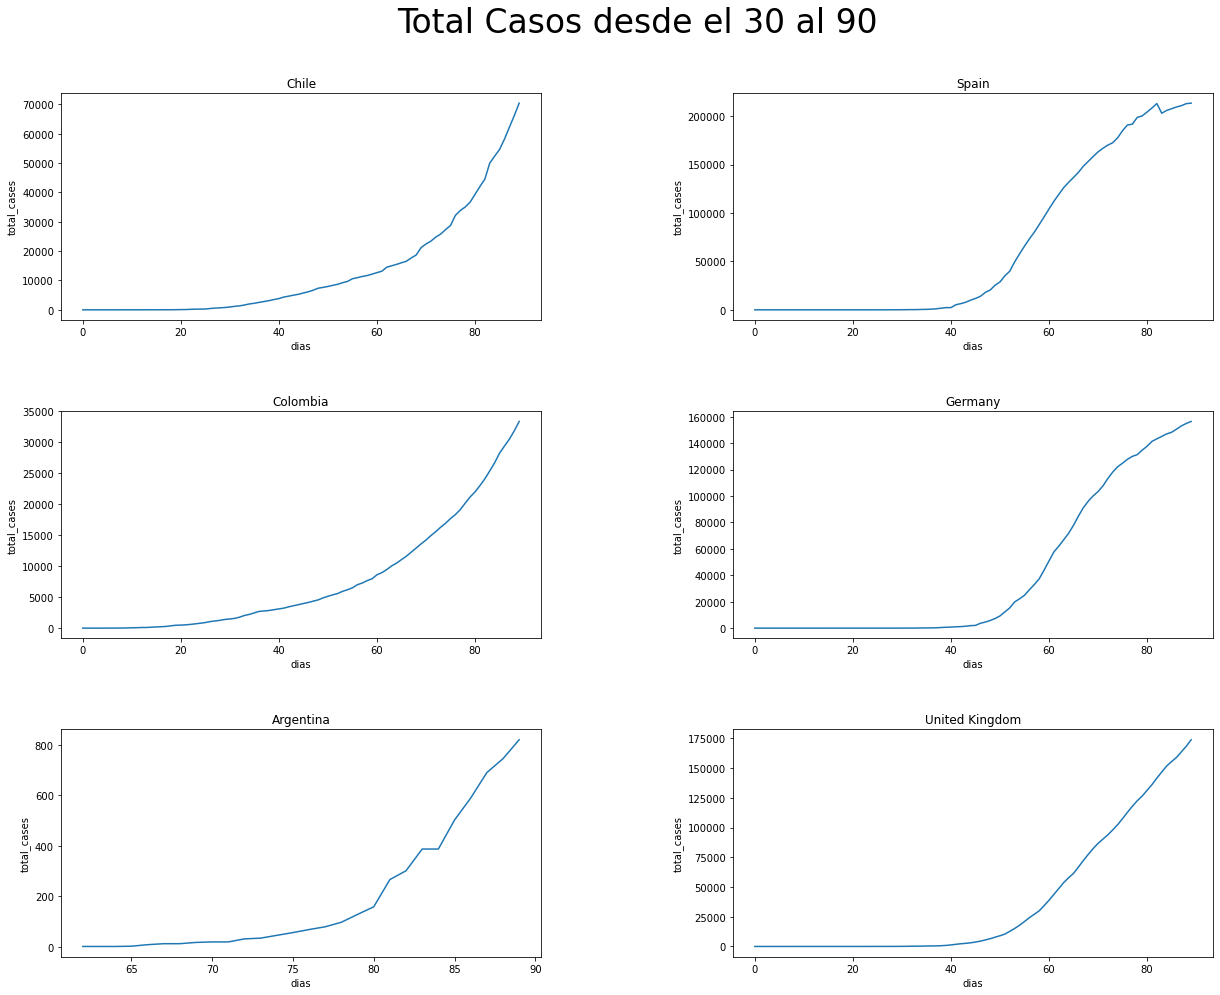

In [17]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(20,15))

sns.lineplot(x='dias',y='total_cases',data=df_cl[inicio:fin],ax=ax1).set_title('Chile')
sns.lineplot(x='dias',y='total_cases',data=df_sp[inicio:fin],ax=ax2).set_title('Spain')
sns.lineplot(x='dias',y='total_cases',data=df_co[inicio:fin],ax=ax3).set_title('Colombia')
sns.lineplot(x='dias',y='total_cases',data=df_ge[inicio:fin],ax=ax4).set_title('Germany')
sns.lineplot(x='dias',y='total_cases',data=df_ar[inicio:fin],ax=ax5).set_title('Argentina')
sns.lineplot(x='dias',y='total_cases',data=df_uk[inicio:fin],ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Total Casos desde el 30 al 90', fontsize=33)

plt.show()

Text(0.5, 0.98, 'Casos Nuevo vs dias')

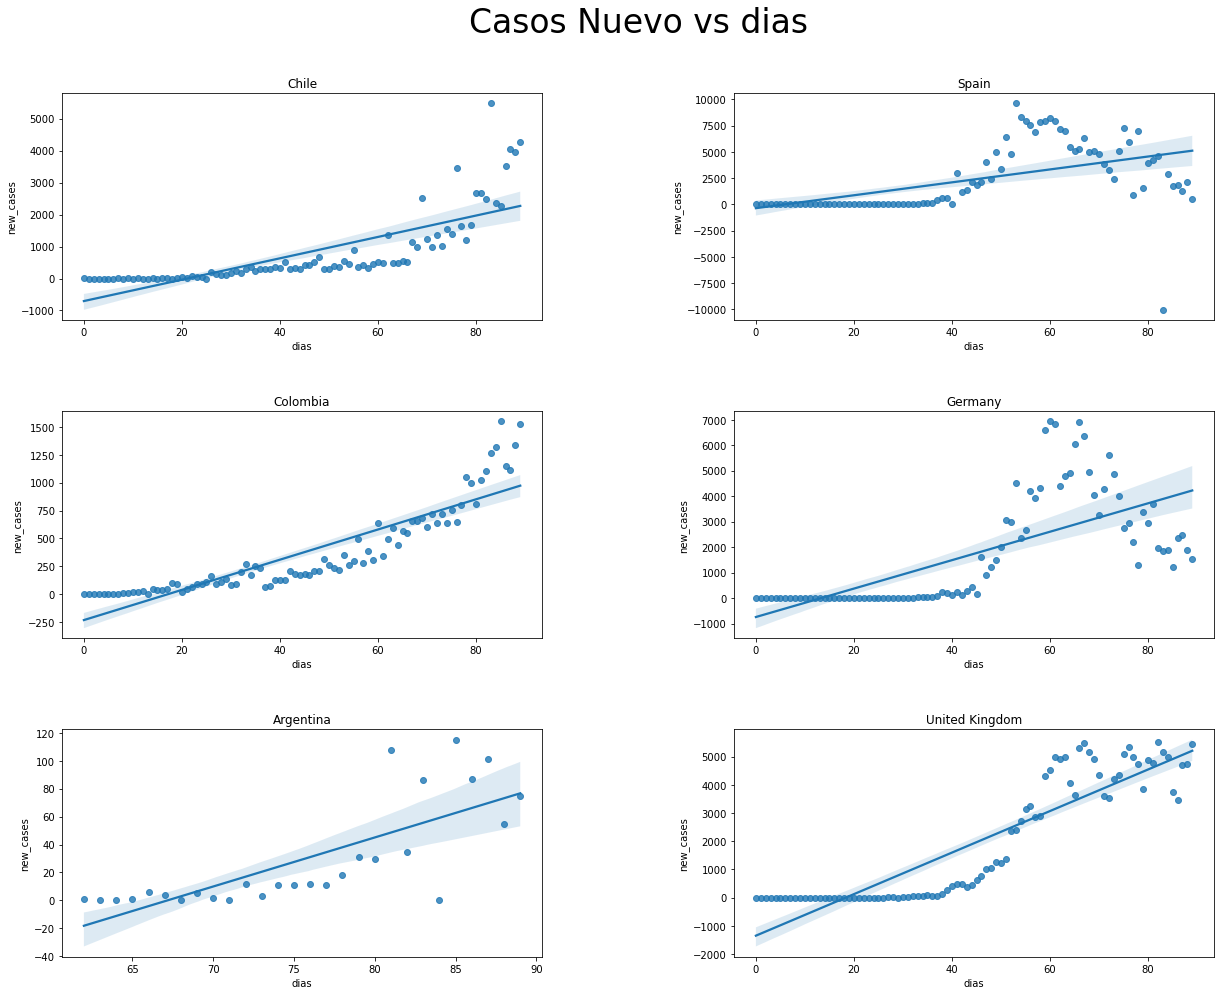

In [18]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(20,15))

sns.regplot(x='dias',y='new_cases',data=df_cl[inicio:fin],ax=ax1).set_title('Chile')
sns.regplot(x='dias',y='new_cases',data=df_sp[inicio:fin],ax=ax2).set_title('Spain')
sns.regplot(x='dias',y='new_cases',data=df_co[inicio:fin],ax=ax3).set_title('Colombia')
sns.regplot(x='dias',y='new_cases',data=df_ge[inicio:fin],ax=ax4).set_title('Germany')
sns.regplot(x='dias',y='new_cases',data=df_ar[inicio:fin],ax=ax5).set_title('Argentina')
sns.regplot(x='dias',y='new_cases',data=df_uk[inicio:fin],ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Casos Nuevo vs dias', fontsize=33)

Un acercamiento a la relacion lineal de la pandemia en el tiempo es muy clara, pero para ese entonces no estaba muy claro cuales serian las medidas que tomaria cada pais al respecto, sin embargo el no tomar medidas acertadas a ese entonces marcara de manera considerable el desarrollo de la misma.

En el caso de Argentina podemos ver que la variable de resago lleva a sus primeros registros luego de los 60 dias.

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$

### Estimacion de factor exponencial de contagios por pasies selecionados


In [19]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [20]:
#Creando columnas para evaluar la prediccion

#chile
dias_cl = df_cl['dias'][inicio:fin]
casos_cl = df_cl['total_cases'][inicio:fin]
#colombia
dias_co = df_co['dias'][inicio:fin]
casos_co = df_co['total_cases'][inicio:fin]
#españa
dias_sp = df_sp['dias'][inicio:fin]
casos_sp = df_sp['total_cases'][inicio:fin]
#alemania
dias_ge = df_ge['dias'][inicio:fin]
casos_ge = df_ge['total_cases'][inicio:fin]

#Argentina
df_ar.fillna(0, inplace=True) #ojo aca 
dias_ar = df_ar['dias'][inicio:fin]
casos_ar = df_ar['total_cases'][inicio:fin]

#reino unido
dias_uk = df_uk['dias'][inicio:fin]
casos_uk = df_uk['total_cases'][inicio:fin]

###### Argentina - en este caso hacemos un remplazo en los valores faltantes, considerando que Arg tuvo casos iniciales sin registro lo que dado su resago influye en el analisis


#### Evaluando dias y casos

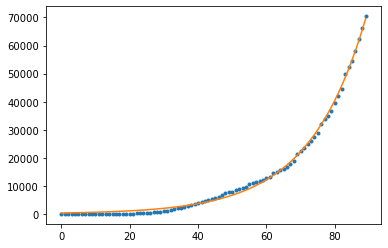

In [21]:
#Chile
diasp = dias_cl
casosp = casos_cl

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_cl = k

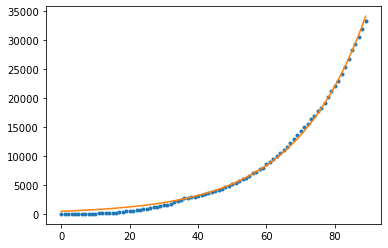

In [22]:
#colombia
diasp = dias_co
casosp = casos_co

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_co = k

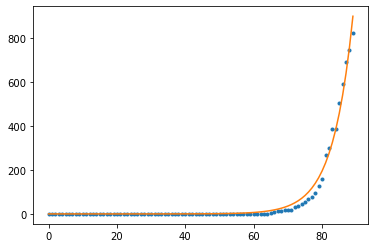

In [23]:
#Argentina
diasp = dias_ar
casosp = casos_ar

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_ar = k

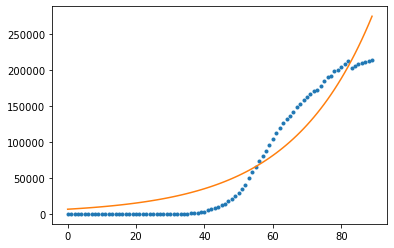

In [24]:
#españa
diasp = dias_sp
casosp = casos_sp

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_sp = k

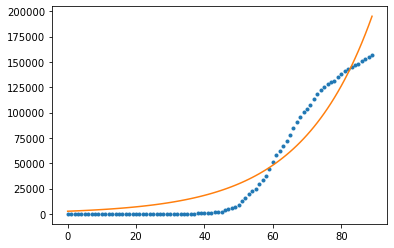

In [25]:
#Alemania
diasp = dias_ge
casosp = casos_ge

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_ge = k

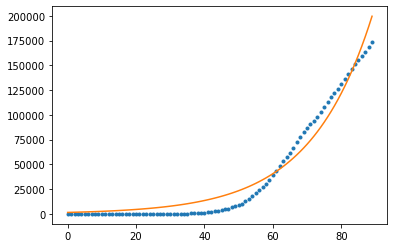

In [26]:
#Reino Unido
diasp = dias_uk
casosp = casos_uk

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_uk = k

###### Al realizar una primera estiamcion simple sobre los casos informados podemos destacar que una vez estimado el factor exponencial para cada pais es posible realizar estimaciones bastante cercanas a la realidad, sin embargo esta metrica es efectiva solo para periodos cortos de tiempo, dado que posibles cambios de tendencia en la curva puede afectar la metrica.

##### En el caso de los paises de Europa se destaca un cambio de tendencia pasado los 80 dias a diferencia de Latam donde la curva tiene muestra una forma mas exponencial lo que puede ser atribuido al desface de propagacion desde Europa a Latam. en el caso de Argentina observa que esta variable exponecial de contagio se retraso dado que el Gob introdujo medidas de restriccion severas y tempranas. 

###### Intervalo de confianza paises selecionados

In [27]:
k_comp = [k_cl,k_co,k_ar,k_sp,k_ge,k_uk]
pais_k = ['cl','co','ar','sp','ge','uk']
k_comp = pd.DataFrame(k_comp,pais_k)
k_comp, k_comp.describe()

(           0
 cl  0.060115
 co  0.048385
 ar  0.169452
 sp  0.042013
 ge  0.048274
 uk  0.054904,
               0
 count  6.000000
 mean   0.070524
 std    0.048861
 min    0.042013
 25%    0.048302
 50%    0.051645
 75%    0.058813
 max    0.169452)

[0   -0.0169
dtype: float64, 0    0.106215
dtype: float64]
0    0.123115
dtype: float64


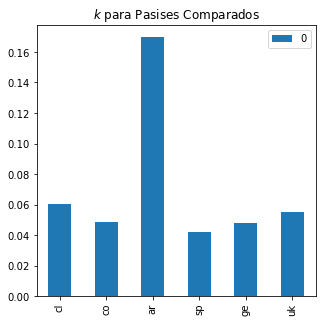

In [28]:
mu_kcomp=np.mean(k_comp)
sigma_ks=np.std(k_comp)
z=1.96
n=len(k_comp)
int_conf= [mu_kcomp-z*sigma_ks/np.sqrt(1),mu_kcomp+z*sigma_ks/np.sqrt(n)]
print(f"{int_conf }")

print(f"{(int_conf[1] - int_conf[0])}")
k_comp.plot(kind="bar",figsize=(5,5),title='$k$ para Pasises Comparados')
plt.show()

######  Podemos observar que la probabilidad que la media del factor exponencial de contagios K este entre un -0.016 y 0.106 con una diferencia de 0.123, esta diferencia es muy grande para poder tener una representacion precisa. Esto es por que los datos de Argentina afectan de manera significativa la muestra por estar retrasada en la curva de contagios.

###### Recordar que estamos en un periodo de tiempo acotado y segun observamos en graficas enteriores que Argentina retrasa los primeros efectos exponeniales de la curva de contagios, sin embargo al transcurrir los primeros 360 dias su curva tiende a alinearse con el resto de los paises. En esta liena sabemos que Argentina establecio cuerentenas estricas rapidamente para contener los contagios, lo que al parecer funciono, sin embargo esta medida pierde efecto en el tiempo. Al mismo tiempo es seria posible afirmar que una baja tasa de contagios mantuvo bajos niveles de Hospitalizacion restando presion al sistema de salud reduciendo las muertes. 



###### Intervalo de confianza sin Argentina

In [29]:
k_comp2 = [k_cl,k_co,k_sp,k_ge,k_uk]
pais_k2 = ['cl','co','sp','ge','uk']
k_comp2 = pd.DataFrame(k_comp2,pais_k2)
k_comp2, k_comp2.describe()

(           0
 cl  0.060115
 co  0.048385
 sp  0.042013
 ge  0.048274
 uk  0.054904,
               0
 count  5.000000
 mean   0.050738
 std    0.006947
 min    0.042013
 25%    0.048274
 50%    0.048385
 75%    0.054904
 max    0.060115)

[0    0.03856
dtype: float64, 0    0.056185
dtype: float64]
0    0.017624
dtype: float64


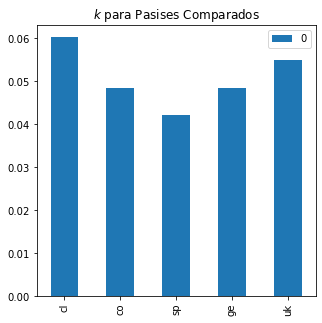

In [30]:
mu_kcomp=np.mean(k_comp2)
sigma_ks=np.std(k_comp2)
z=1.96
n=len(k_comp2)
int_conf= [mu_kcomp-z*sigma_ks/np.sqrt(1),mu_kcomp+z*sigma_ks/np.sqrt(n)]
print(f"{int_conf }")

print(f"{(int_conf[1] - int_conf[0])}")
k_comp2.plot(kind="bar",figsize=(5,5),title='$k$ para Pasises Comparados')
plt.show()

###### Es posible observar que una vez eliminado Argentina nuestro intervalo de confianza se reduce a  0.038 y 0.056 lo que no es una reduccion significativa en relacion a los paises de la muestra, pero reduciendo la diferencia a 0.019, mucho menor que la anterior 0.017.

##### Esto indica que el facto de contagio exponencial para este grupo de paises esta bastante similar.

## Por ultimo evaluaremos que tan efectivo ha sido el plan de vacunacion impuesto en este grupo de paises.

#### Segun la OMS un pais puede estar cerca de lograr la inmunidad de rebaño si consigue vacunar al menos al 67% de su poblacion. Esto ademas reafirmado por las nuevas variantes y la necesidad de reforzar este proceso con hasta tres dosis hasta ahora.

In [31]:
#Datos poblacion Mundial segun porcentaje de vacunacion minimo para inmunidad de rebaño.
pob_obj_cl = 19116.21 *1000 *0.67
pob_obj_sp = 47351.57 *1000 *0.67
pob_obj_co = 50882.88 *1000 *0.67
pob_obj_ge = 83240.52 *1000 *0.67
pob_obj_ar = 45376.76 *1000 *0.67
pob_obj_uk = 67215.29 *1000 *0.67

#### Creamos una nueva columna con valores 0 y 1 segun el nivel de vacunados totales de cada pais.

In [32]:
def pob_vac_tola_per (fila):
    if fila >= pob_obj_sp :
        return 1 #porcentaje minimo vacunado
    else :
        return 0 #no alcanza el porcentaje min
df_sp["pob_vac_tola_per"] = df_sp["people_vaccinated"].map(pob_vac_tola_per)

In [33]:
def pob_vac_tola_per (fila):
    if fila >= pob_obj_uk :
        return 1 #porcentaje minimo vacunado
    else :
        return 0 #no alcanza el porcentaje min
df_uk["pob_vac_tola_per"] = df_uk["people_vaccinated"].map(pob_vac_tola_per)

In [34]:
def pob_vac_tola_per (fila):
    if fila >= pob_obj_ge :
        return 1 #porcentaje minimo vacunado
    else :
        return 0 #no alcanza el porcentaje min
df_ge["pob_vac_tola_per"] = df_ge["people_vaccinated"].map(pob_vac_tola_per)

In [35]:
def pob_vac_tola_per (fila):
    if fila >= pob_obj_cl :
        return 1 #porcentaje minimo vacunado
    else :
        return 0 #no alcanza el porcentaje min
df_cl["pob_vac_tola_per"] = df_cl["people_vaccinated"].map(pob_vac_tola_per)

In [36]:
def pob_vac_tola_per (fila):
    if fila >= pob_obj_ar :
        return 1 #porcentaje minimo vacunado
    else :
        return 0 #no alcanza el porcentaje min
df_ar["pob_vac_tola_per"] = df_ar["people_vaccinated"].map(pob_vac_tola_per)

In [37]:
def pob_vac_tola_per (fila):
    if fila >= pob_obj_co :
        return 1 #porcentaje minimo vacunado
    else :
        return 0 #no alcanza el porcentaje min
df_co["pob_vac_tola_per"] = df_co["people_vaccinated"].map(pob_vac_tola_per)

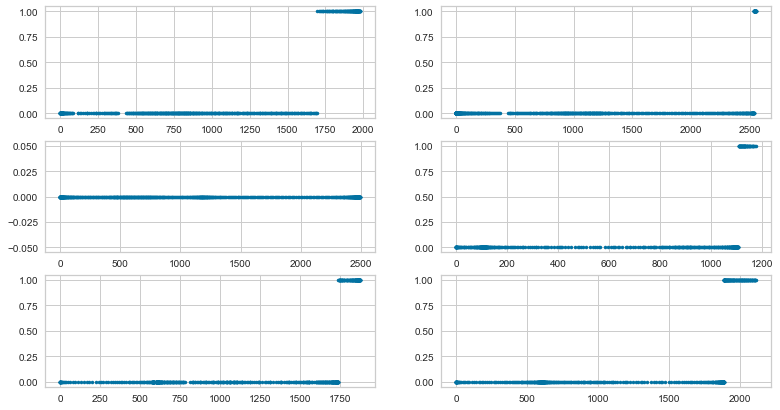

In [145]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(13,7))

ax1.plot(df_cl['total_deaths_per_million'],df_cl['pob_vac_tola_per'],'.')
ax2.plot(df_ar['total_deaths_per_million'],df_ar['pob_vac_tola_per'],'.')
ax3.plot(df_co['total_deaths_per_million'],df_co['pob_vac_tola_per'],'.')
ax4.plot(df_ge['total_deaths_per_million'],df_ge['pob_vac_tola_per'],'.')
ax5.plot(df_sp['total_deaths_per_million'],df_sp['pob_vac_tola_per'],'.')
ax6.plot(df_uk['total_deaths_per_million'],df_uk['pob_vac_tola_per'],'.')

plt.show()

#### Podemos ver que una vez establecida la politica a evaluar, existe un cambio en la cantiada de muertes cuando se alcanza la unmunidad de rebaño. ASi como tambien podemos ver que aun hay paises que no logran este objetivo en Latam como es el caso de Colombia.

###### Unimos los datos para nuestro modelo

In [71]:
#Selecionamos las columnas
col_prop = ["total_cases_per_million",
            "total_deaths_per_million",
            'hosp_patients_per_million',
            'total_vaccinations_per_hundred',
            'pob_vac_tola_per',
            'median_age',
            "continent"]

In [72]:
paiset = pd.concat([df_cl,df_co,df_sp,df_ge,df_uk])
paiset = paiset[col_prop]
paiset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3230 entries, 24088 to 126678
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   total_cases_per_million         3230 non-null   float64
 1   total_deaths_per_million        3078 non-null   float64
 2   hosp_patients_per_million       907 non-null    float64
 3   total_vaccinations_per_hundred  1412 non-null   float64
 4   pob_vac_tola_per                3230 non-null   int64  
 5   median_age                      3230 non-null   float64
 6   continent                       3230 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 201.9+ KB


In [73]:
paiset.fillna(0, inplace=True)

In [74]:
paiset['continent'].replace(['South America','Europe'],[0,1],inplace=True)

In [75]:
paiset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3230 entries, 24088 to 126678
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   total_cases_per_million         3230 non-null   float64
 1   total_deaths_per_million        3230 non-null   float64
 2   hosp_patients_per_million       3230 non-null   float64
 3   total_vaccinations_per_hundred  3230 non-null   float64
 4   pob_vac_tola_per                3230 non-null   int64  
 5   median_age                      3230 non-null   float64
 6   continent                       3230 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 201.9 KB


In [76]:
# # Es posible establecer alguno rango para evaluar periodos precisos
# rango_in = paiset["dias"].min()
# rango_fin = paiset["dias"].max()

In [77]:
# p_eur = paiset[(paiset["continent"] == 1) & (paiset["dias"] >= rango_in) & (paiset["dias"] <= rango_fin)]
# p_ltm = paiset[(paiset["continent"] == 0) & (paiset["dias"] >= rango_in) & (paiset["dias"] <= rango_fin)]

p_eur = paiset[(paiset["continent"] == 1)]
p_ltm = paiset[(paiset["continent"] == 0)]


print('Europa {}'.format(p_eur.shape))
print('Latam {}'.format(p_ltm.shape))

Europa (1974, 7)
Latam (1256, 7)


# Evaluando los procesos de vacunación

###### En este caso utilizaremos la libreria de Pycaret  considerando que nos permite hacer multiples evaluaciones de forma mas efeciente.

### Evaluando Europa

In [78]:
from pycaret.classification import *

#Definimos la Variables explicativa.
clf1 = setup(data = p_eur, target = 'pob_vac_tola_per')

,Description,Value
0,session_id,7804
1,Target,pob_vac_tola_per
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1974, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [79]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9993,0.9977,0.9955,1.0000,0.9977,0.9972,0.9973,0.0090
rf,Random Forest Classifier,0.9993,1.0000,0.9955,1.0000,0.9977,0.9972,0.9973,0.1220
gbc,Gradient Boosting Classifier,0.9993,0.9977,0.9955,1.0000,0.9977,0.9972,0.9973,0.0700
xgboost,Extreme Gradient Boosting,0.9993,0.9999,0.9955,1.0000,0.9977,0.9972,0.9973,0.0490
lightgbm,Light Gradient Boosting Machine,0.9993,1.0000,0.9955,1.0000,0.9977,0.9972,0.9973,0.1910
ada,Ada Boost Classifier,0.9986,0.9997,0.9955,0.9955,0.9953,0.9945,0.9946,0.0570
catboost,CatBoost Classifier,0.9986,1.0000,0.9955,0.9955,0.9953,0.9945,0.9946,1.1170
et,Extra Trees Classifier,0.9978,1.0000,0.9909,0.9957,0.9931,0.9918,0.9919,0.1020
lr,Logistic Regression,0.9703,0.9941,0.8939,0.9219,0.9040,0.8865,0.8892,0.5540
knn,K Neighbors Classifier,0.9660,0.9699,0.8803,0.9095,0.8900,0.8700,0.8733,0.0160


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7804, splitter='best')

### Para este caso utilizaremos el modelo rf segundo en la lista.

In [80]:
#Fold-k indica el numero de validaciones cruzadas para el modelo
lgth = create_model(
    estimator='rf'
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9928,1.0000,0.9545,1.0000,0.9767,0.9725,0.9728
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Para el caso de Europa vemos que el modelo es capas de obtener un accuracy muy cercano a uno, lo que indica que el proceso de vacunacion ha logrado reducir el numero de muertos en aquellos en aquellos que logran la inmunidad de rebaño.

In [81]:
evaluate_model(lgth)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Evaluando el modelo en paises de Latam

In [91]:
predict =  predict_model(lgth, data=p_ltm)
predict.head()
#importante se crea las columnas Label y Score

,total_cases_per_million,total_deaths_per_million,hosp_patients_per_million,total_vaccinations_per_hundred,pob_vac_tola_per,median_age,continent,Label,Score
24088,0.104,0.0,0.0,0.0,0,35.4,0,0,1.0
24089,0.104,0.0,0.0,0.0,0,35.4,0,0,1.0
24090,0.104,0.0,0.0,0.0,0,35.4,0,0,1.0
24091,0.104,0.0,0.0,0.0,0,35.4,0,0,1.0
24092,0.104,0.0,0.0,0.0,0,35.4,0,0,1.0


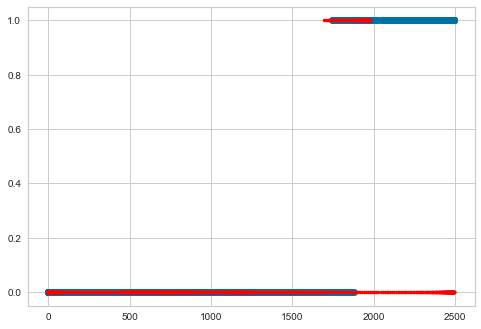

In [95]:
plt.plot(predict['total_deaths_per_million'],predict['Label'],'o')
plt.plot(predict['total_deaths_per_million'],predict['pob_vac_tola_per'],'.', color='red')

plt.show()

## Obervamos que para el caso de Latam el proceso de vacunacion puede tener exito en la medida que los paises resagados puedan completar el esquema de vacunacion.

#### Optimzando el modelo

In [146]:
tuned_lgth = tune_model(lgth)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9928,1.0000,0.9545,1.0000,0.9767,0.9725,0.9728
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [147]:
tune_model(tuned_lgth, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9928,1.0000,0.9545,1.0000,0.9767,0.9725,0.9728
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=11, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=7804, verbose=0,
                       warm_start=False)

In [148]:
evaluate_model(tuned_lgth)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [149]:
predict_tuned =  predict_model(tuned_lgth, data=p_ltm)
predict_tuned.head()

,total_cases_per_million,total_deaths_per_million,hosp_patients_per_million,total_vaccinations_per_hundred,pob_vac_tola_per,median_age,continent,Label,Score
24088,0.104,0.0,0.0,0.0,0,35.4,0,0,1.0
24089,0.104,0.0,0.0,0.0,0,35.4,0,0,1.0
24090,0.104,0.0,0.0,0.0,0,35.4,0,0,1.0
24091,0.104,0.0,0.0,0.0,0,35.4,0,0,1.0
24092,0.104,0.0,0.0,0.0,0,35.4,0,0,1.0


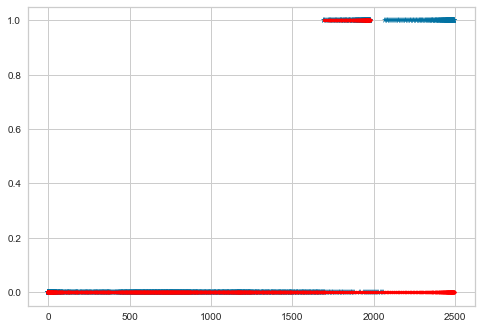

In [160]:
plt.plot(predict_tuned['total_deaths_per_million'],predict_tuned['Label'],'*')
plt.plot(predict_tuned['total_deaths_per_million'],predict_tuned['pob_vac_tola_per'],'.', color='red')
plt.show()

### Una vez optimizado el modelo y vuelto a aplicar a Latam los resultados no son mejores de los esperado dado que ya lograba explicar de manera bastante precisa el efecto de la vacunacion.

## Evaluando Latam

clf2 = setup(data = p_ltm, target = 'pob_vac_tola_per')

In [153]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0250
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0100
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1150
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0110
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0420
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0970
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0430
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8940
ridge,Ridge Classifier,0.9989,0.0000,1.0000,0.9900,0.9947,0.9941,0.9943,0.0110
lightgbm,Light Gradient Boosting Machine,0.9989,1.0000,0.9900,1.0000,0.9947,0.9941,0.9943,0.1590


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5469, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### En el caso de Latam varios de los modelos pueden explicar con bastante precision el resultado sin embargo utilizaremos rf al igual que Erupa.

In [154]:
#Fold-k indica el numero de validaciones cruzadas para el modelo
lgth2 = create_model(
    estimator='lightgbm'
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9886,1.0000,0.9000,1.0000,0.9474,0.9410,0.9427
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Podemos observar que para el caso de Latam el Accuracy medio estiamdo es de 0.99 muy simalar al obtenido en Europa, lo que reafirma la efectividad de la vacuna como politica para reducir las muertes por Covid 19

In [155]:
evaluate_model(lgth2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Evaluemos esta medida para algunos paises del conteninente africano, considerando que es donde los niveles de vacunacion estan muy por debajao de lo esperado.

#### Pre porceso de datos

In [161]:
paises_africa = datos[datos.location.isin(['Sudan','Egypt','Libya','Nigeria'])]

In [162]:
paises_africa['people_vaccinated'].fillna(method='bfill',inplace=True)

In [164]:
df_su= paises_africa[paises_africa['location']=='Sudan']
df_eg= paises_africa[paises_africa['location']=='Egypt']
df_li= paises_africa[paises_africa['location']=='Libya']
df_ni= paises_africa[paises_africa['location']=='Nigeria']

In [165]:
df_su =df_su.drop(df_su.index[len(df_su)-1])
df_eg =df_eg.drop(df_eg.index[len(df_eg)-1])
df_li =df_li.drop(df_li.index[len(df_li)-1])
df_ni =df_ni.drop(df_ni.index[len(df_ni)-1])

In [166]:
#creamos la columna dias, que nos ayudara a trabajar los datos en funcion del tiempo, no hablamos de fechas si no de dias transcurridos.
df_su['dias']=np.arange(0,len(df_su['location']))
df_eg['dias']=np.arange(0,len(df_eg['location']))
df_li['dias']=np.arange(0,len(df_li['location']))
df_ni['dias']=np.arange(0,len(df_ni['location']))

In [169]:
#Datos poblacion Mundial segun porcentaje de vacunacion minimo para inmunidad de rebaño.
pob_obj_su=  43849.27 *1000 *0.67
pob_obj_eg= 102334.40 *1000 *0.67
pob_obj_li=   6871.29 *1000 *0.67
pob_obj_ni= 206139.59 *1000 *0.67


In [170]:
def pob_vac_tola_per (fila):
    if fila >= pob_obj_su :
        return 1 #porcentaje minimo vacunado
    else :
        return 0 #no alcanza el porcentaje min
df_su["pob_vac_tola_per"] = df_su["people_vaccinated"].map(pob_vac_tola_per)

In [171]:
def pob_vac_tola_per (fila):
    if fila >= pob_obj_eg :
        return 1 #porcentaje minimo vacunado
    else :
        return 0 #no alcanza el porcentaje min
df_eg["pob_vac_tola_per"] = df_eg["people_vaccinated"].map(pob_vac_tola_per)

In [172]:
def pob_vac_tola_per (fila):
    if fila >= pob_obj_li :
        return 1 #porcentaje minimo vacunado
    else :
        return 0 #no alcanza el porcentaje min
df_li["pob_vac_tola_per"] = df_li["people_vaccinated"].map(pob_vac_tola_per)

In [173]:
def pob_vac_tola_per (fila):
    if fila >= pob_obj_ni :
        return 1 #porcentaje minimo vacunado
    else :
        return 0 #no alcanza el porcentaje min
df_ni["pob_vac_tola_per"] = df_ni["people_vaccinated"].map(pob_vac_tola_per)

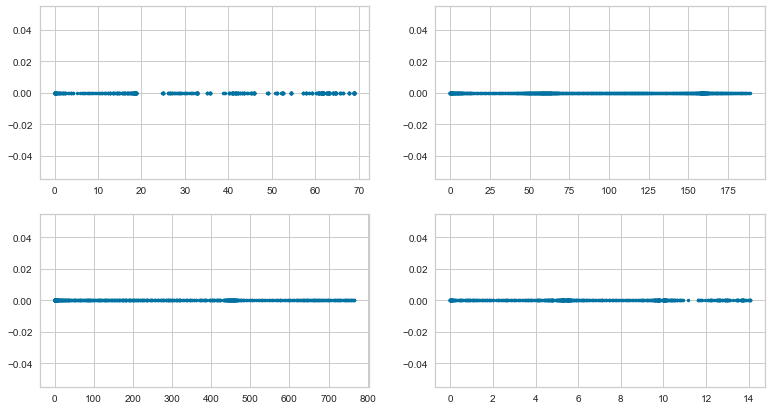

In [181]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(13,7))

ax1.plot(df_su['total_deaths_per_million'],df_su['pob_vac_tola_per'],'.')
ax2.plot(df_eg['total_deaths_per_million'],df_eg['pob_vac_tola_per'],'.')
ax3.plot(df_li['total_deaths_per_million'],df_li['pob_vac_tola_per'],'.')
ax4.plot(df_ni['total_deaths_per_million'],df_ni['pob_vac_tola_per'],'.')


plt.show()

### Podemos observar que los paises de Africa selecionados por su cercania por Europa no han logrado alcanzar su inmunidad de rebaño, dao que no ha logrado vacunar al porcentaje objetivo.

In [184]:
#Selecionamos las columnas
col_prop_2 = ["total_cases_per_million",
            "total_deaths_per_million",
            'hosp_patients_per_million',
            'total_vaccinations_per_hundred',
            'pob_vac_tola_per',
            'median_age',
            ]

In [191]:
paiset_A = pd.concat([df_su,df_eg,df_li,df_ni])
paiset_A = paiset_A[col_prop_2]
paiset_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 114382 to 88746
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   total_cases_per_million         2490 non-null   float64
 1   total_deaths_per_million        2435 non-null   float64
 2   hosp_patients_per_million       0 non-null      float64
 3   total_vaccinations_per_hundred  192 non-null    float64
 4   pob_vac_tola_per                2512 non-null   int64  
 5   median_age                      2512 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 137.4 KB


In [192]:
paiset_A.fillna(0, inplace=True)

In [193]:
#Definimos la Variables explicativa.
clf2 = setup(data = paiset_A, target = 'pob_vac_tola_per')

,Description,Value
0,session_id,796
1,Target,pob_vac_tola_per
2,Target Type,Binary
3,Label Encoded,0: 0
4,Original Data,"(2512, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [194]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0180
nb,Naive Bayes,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0100
dt,Decision Tree Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0090
ridge,Ridge Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0090
rf,Random Forest Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0920
ada,Ada Boost Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0130
lda,Linear Discriminant Analysis,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0100
et,Extra Trees Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0740
xgboost,Extreme Gradient Boosting,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0410
lightgbm,Light Gradient Boosting Machine,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0120


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### Para este caso utilizaremos el modelo rf segundo en la lista.

In [195]:
#Fold-k indica el numero de validaciones cruzadas para el modelo
lgth = create_model(
    estimator='rf'
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
1,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
3,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
4,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
5,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
6,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
7,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
8,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
9,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000


### Para el caso de Europa vemos que el modelo es capas de obtener un accuracy muy cercano a uno, lo que indica que el proceso de vacunacion ha logrado reducir el numero de muertos en aquellos en aquellos que logran la inmunidad de rebaño.

In [196]:
evaluate_model(lgth)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Evaluando el modelo en paises de Latam

In [197]:
predict =  predict_model(lgth, data=paiset_A)
predict.head()
#importante se crea las columnas Label y Score

,total_cases_per_million,total_deaths_per_million,hosp_patients_per_million,total_vaccinations_per_hundred,pob_vac_tola_per,median_age,Label
114382,0.000,0.000,0.0,0.0,0,19.7,0
114383,0.000,0.022,0.0,0.0,0,19.7,0
114384,0.022,0.022,0.0,0.0,0,19.7,0
114385,0.022,0.022,0.0,0.0,0,19.7,0
114386,0.022,0.022,0.0,0.0,0,19.7,0


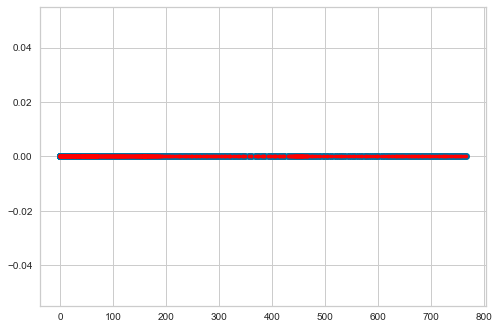

In [198]:
plt.plot(predict['total_deaths_per_million'],predict['Label'],'o')
plt.plot(predict['total_deaths_per_million'],predict['pob_vac_tola_per'],'.', color='red')

plt.show()

## Como podemos ver en el caso de los paises de Africa el modelo nos indica que mientras no se alcance una inmunidad de rebaño las muertes no cesaran y por tanto es muy probable que por el moneto la vacunacion debe seguir avanzando sobre todo en aquellos paises de menores ingreso. 